Community analysis

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib.classes import NodeClustering
from collections import defaultdict, deque
import math
from typing import *
import seaborn as sns

In [5]:
coll_graph = nx.read_pajek('./data/correct_epo_collaboration_graph.net')
print(coll_graph.number_of_nodes())
print(coll_graph.number_of_edges())
print(nx.is_connected(coll_graph))
print(nx.number_connected_components(coll_graph))
# Dist of connected component sizes
connected_components = nx.connected_components(coll_graph)

print([len(c) for c in sorted(connected_components, key=len, reverse=True)])
largest_cc = max(nx.connected_components(coll_graph), key=len)


27781
69556
False
6398
[10635, 53, 35, 31, 27, 26, 23, 23, 22, 22, 21, 20, 19, 19, 18, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

1. Layout expected ground truth

{'Inplanta': 'A', 'Chengdu Boe Optoelectronics Technology Co. Ltd.': 'G', 'Sentinhealth': 'A', 'Zilinská Univerzita V Ziline': 'A', 'Airbus Atlantic S.A.S.': 'B', 'Mukhanov, Oleg A': 'G', 'Dzne  The German Center For Neurodegenerative Diseases': 'A', 'Be Ip Association N° 652': 'G', 'Pentamedix Co. Ltd.': 'C', 'Hanmi Pharm. Co. Ltd.': 'A', 'Joint Stock Co. Central Design Bureau Of Machine Building': 'F', 'Nanostring Technologies Inc.': 'C', 'University Of Cincinnati': 'A', 'Universite Daix Marseille': 'A', 'Liu, David R.': 'C', 'M-I Drilling Fluids U.K. Ltd.': 'C', 'Ri.Med Foundation': 'A', 'Epox-Co2 S.R.L.': 'B', 'Citeve Centro Tecnológico Das Indústrias Têxtil E Do Vestuário De Portugal': 'D', 'Centrum Techniki Okretowej S.A.': 'A', 'Valeo Siemens Eautomotive Germany Gmbh': 'H', 'Beijing Tsinghua Changgung Hospital': 'G', 'Gkn Driveline International Gmbh': 'C', 'Servei De Salut De Les Illes Balears Ibsalut': 'A', 'Kawada Robotics Corp.': 'B', 'Lamellar Biomedical Ltd.': 'A', 'Centre

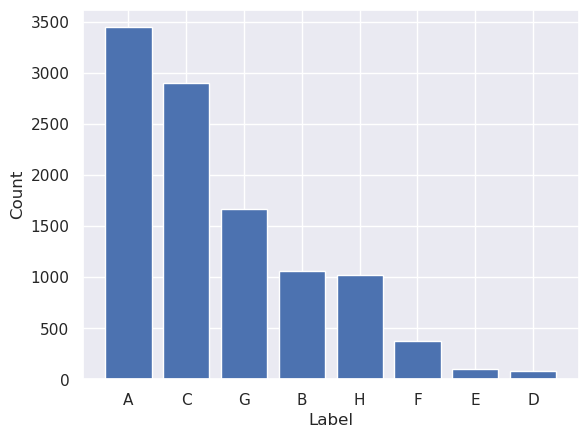

In [62]:

institution2label = {}
close_calls = 0
for node in largest_cc:
    institution = coll_graph.nodes[node]
    label_counts = {}
    for u,v,data in coll_graph.edges(node, data=True):
        label = data['label']
        # if label != 'A' and label != 'C':
        #     label = 'O'
        if label not in label_counts:
            label_counts[label] = 1
        else:
            label_counts[label] += 1
    max_label = max(label_counts, key=label_counts.get)
    second_max_label = max(label_counts, key=lambda x: label_counts[x] if x != max_label else 0)
    if max_label != second_max_label and label_counts[second_max_label]/label_counts[max_label] > 0.75:
        close_calls += 1
    institution2label[node] = max_label
print(institution2label)
print("no. of close calls %d, %.2f%% (second most frequent label >0.5 of assigned)" % (close_calls, close_calls*100/len(largest_cc)))

# Plot dist of labels sorted
label_global_counts = defaultdict(int)
for label in institution2label.values():
    label_global_counts[label] += 1
print(label_global_counts)
print(len(largest_cc))
print((label_global_counts['A']+label_global_counts['C'])/len(largest_cc))
# Sort by count and plot
sns.set_theme()
sorted_labels = sorted(label_global_counts, key=label_global_counts.get, reverse=True)
sorted_counts = [label_global_counts[label] for label in sorted_labels]
ax = plt.figure()
plt.bar(sorted_labels, sorted_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


2. Community detection

In [10]:
def known_clustering(G: nx.Graph, cluster_attr="id") -> NodeClustering:
    """Extracts known node clustering from their attrubute with supplied name."""

    C = defaultdict(list)
    for i, data in G.nodes(data=True):
        C[data[cluster_attr]].append(i)

    return NodeClustering(list(C.values()), G, "Known")


def CD_comparison(G: nx.Graph, algs: Dict[str, Callable[..., NodeClustering]], runs=1) -> None:
    """Compare quality of community-detection algorithms on G.
    Algorithms must conform to the cdlib format (returning a NodeClustering object)."""
    K = known_clustering(G)

    print("{:>12s} | {:5s} {:^6s}  {:^5s}  {:^5s}  {:^5s}".format(
        'Algorithm', 'Count', 'Q', 'NMI', 'ARI', 'VI'))

    for alg in algs:
        s, Q, NMI, ARI, VI = 0, 0, 0, 0, 0

        for _ in range(runs):
            C = algs[alg](G)
            s += len(C.communities) / runs # C.communities is a list of lists of node IDs
            Q += C.newman_girvan_modularity().score / runs
            NMI += K.normalized_mutual_information(C).score / runs
            ARI += K.adjusted_rand_index(C).score / runs
            VI += K.variation_of_information(C).score / runs

        print("{:>12s} | {:>5.0f} {:6.3f}  {:5.3f}  {:5.3f}  {:5.3f}".format(
            '\'' + alg + '\'', s, Q, NMI, ARI, VI))
    print()

In [53]:
# --- LOUVAIN ---
avrg_num_communities = 0
avrg_modularity = 0
for _ in range(10):
    louvain_comms = nx.community.louvain_communities(coll_graph.subgraph(largest_cc))
    modularity = nx.community.quality.modularity(coll_graph.subgraph(largest_cc), louvain_comms)
    avrg_num_communities += len(louvain_comms)/10
    avrg_modularity += modularity/10

print("Louvain: %.2f communities, %.3f modularity" % (avrg_num_communities, avrg_modularity))

# Communites:
# 0: USA
# 1: France
# 2: Japan
# 3: Germany
# 4: Spain
# 5: Korea

Louvain: 102.20 communities, 0.855 modularity


In [91]:
sorted_communities = sorted(louvain_comms, key=len, reverse=True)
freq_changes = []
for i, comm in enumerate(sorted_communities[:10]):
    print("Community %d" % i)
    print("  Size: %d" % len(comm))
    label_counts = {}
    for node in comm:
        label = institution2label[node]
        if label not in label_counts:
            label_counts[label] = 1
        else:
            label_counts[label] += 1
    label_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    # COmpare with global - see overrepresentation
    for label, count in label_counts:
        global_ratio = label_global_counts[label]/len(largest_cc)
        comm_ratio = count/len(comm)
        freq_changes.append(abs(comm_ratio-global_ratio))
        print("    %s: %.2f%% -> %.2f%% (%.2f%% increase)" % (label, global_ratio*100, comm_ratio*100, (comm_ratio-global_ratio)*100))

print("Average frequency change: %.2f%%" % (sum(freq_changes)/len(freq_changes)*100))

Community 0
  Size: 1246
    A: 32.39% -> 30.98% (-1.41% increase)
    C: 27.25% -> 28.57% (1.32% increase)
    G: 15.69% -> 19.98% (4.29% increase)
    H: 9.55% -> 9.87% (0.32% increase)
    B: 9.96% -> 7.38% (-2.57% increase)
    F: 3.51% -> 1.85% (-1.66% increase)
    E: 0.90% -> 0.80% (-0.10% increase)
    D: 0.74% -> 0.56% (-0.18% increase)
Community 1
  Size: 1232
    C: 27.25% -> 31.49% (4.24% increase)
    A: 32.39% -> 28.17% (-4.23% increase)
    G: 15.69% -> 13.72% (-1.98% increase)
    B: 9.96% -> 12.09% (2.14% increase)
    H: 9.55% -> 9.42% (-0.14% increase)
    F: 3.51% -> 3.41% (-0.10% increase)
    D: 0.74% -> 0.89% (0.15% increase)
    E: 0.90% -> 0.81% (-0.09% increase)
Community 2
  Size: 1033
    A: 32.39% -> 48.40% (16.01% increase)
    C: 27.25% -> 31.75% (4.50% increase)
    G: 15.69% -> 11.04% (-4.66% increase)
    H: 9.55% -> 4.07% (-5.49% increase)
    B: 9.96% -> 3.19% (-6.76% increase)
    F: 3.51% -> 1.06% (-2.44% increase)
    D: 0.74% -> 0.29% (-0.45% inc

In [46]:
sorted_comms = sorted(louvain_comms, key=len, reverse=True)
for i, comm in enumerate(sorted_comms[0:5]):
    print("Community %d" % i)
    label_counts = {}
    for node in comm:
        label = institution2label[node]
        if label not in label_counts:
            label_counts[label] = 1
        else:
            label_counts[label] += 1
    label_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    print(label_counts)
        
    

Community 0
[('A', 387), ('C', 363), ('G', 244), ('H', 118), ('B', 91), ('F', 24), ('E', 10), ('D', 6)]
Community 1
[('C', 370), ('A', 346), ('G', 157), ('B', 132), ('H', 107), ('F', 37), ('D', 11), ('E', 10)]
Community 2
[('A', 487), ('C', 325), ('G', 111), ('B', 35), ('H', 30), ('F', 11), ('D', 3), ('E', 2)]
Community 3
[('C', 194), ('G', 161), ('A', 137), ('B', 130), ('H', 102), ('F', 33), ('E', 6), ('D', 3)]
Community 4
[('A', 249), ('C', 172), ('G', 72), ('B', 24), ('H', 21), ('F', 9), ('D', 4)]


In [95]:
# Louvain for USA

sorted_louvain_comms = sorted(louvain_comms, key=len, reverse=True)
freq_changes = []
for i, country in enumerate(sorted_louvain_comms[:5]):
    country_subgraph = coll_graph.subgraph(country)
    country_louvain_comms = nx.community.louvain_communities(country_subgraph)
    sorted_country_louvain_comms = sorted(country_louvain_comms, key=len, reverse=True)
    country_label_counts = {}
    for node in country:
        label = institution2label[node]
        if label not in country_label_counts:
            country_label_counts[label] = 1
        else:
            country_label_counts[label] += 1
    
    print("Country %d" % i)
    print("  Size: %d" % len(country))
    for j, comm in enumerate(sorted_country_louvain_comms[:3]):
        print("  Community %d" % j)
        print("    Size: %d" % len(comm))
        label_counts = {}
        for node in comm:
            label = institution2label[node]
            if label not in label_counts:
                label_counts[label] = 1
            else:
                label_counts[label] += 1
        label_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
        # COmpare with global - see overrepresentation
        for label, count in label_counts:
            country_wide_ratio = country_label_counts[label]/len(country)
            comm_ratio = count/len(comm)
            freq_changes.append(abs(comm_ratio-country_wide_ratio)) 
            print("    %s: %.2f%% -> %.2f%% (%.2f%% increase)" % (label, country_wide_ratio*100, comm_ratio*100, (comm_ratio-country_wide_ratio)*100))
print("Average frequency change: %.2f%%" % (sum(freq_changes)/len(freq_changes)*100))

Country 0
  Size: 1246
  Community 0
    Size: 292
    G: 19.98% -> 26.71% (6.73% increase)
    A: 30.98% -> 20.21% (-10.77% increase)
    C: 28.57% -> 19.52% (-9.05% increase)
    H: 9.87% -> 17.81% (7.94% increase)
    B: 7.38% -> 9.93% (2.55% increase)
    F: 1.85% -> 3.77% (1.92% increase)
    E: 0.80% -> 1.37% (0.57% increase)
    D: 0.56% -> 0.68% (0.12% increase)
  Community 1
    Size: 291
    A: 30.98% -> 45.02% (14.04% increase)
    C: 28.57% -> 29.90% (1.33% increase)
    G: 19.98% -> 17.87% (-2.11% increase)
    H: 9.87% -> 3.78% (-6.09% increase)
    B: 7.38% -> 1.72% (-5.67% increase)
    D: 0.56% -> 1.03% (0.47% increase)
    E: 0.80% -> 0.34% (-0.46% increase)
    F: 1.85% -> 0.34% (-1.50% increase)
  Community 2
    Size: 123
    A: 30.98% -> 39.02% (8.05% increase)
    C: 28.57% -> 33.33% (4.76% increase)
    G: 19.98% -> 12.20% (-7.79% increase)
    B: 7.38% -> 8.13% (0.75% increase)
    H: 9.87% -> 3.25% (-6.62% increase)
    E: 0.80% -> 2.44% (1.64% increase)
    F

In [20]:
algs = {"Known": lambda G: known_clustering(G), "Infomap": algorithms.infomap, "Louvain": algorithms.louvain,
        "LPA": algorithms.label_propagation, "GM": lambda G: algorithms.greedy_modularity(G),}



CD_comparison(usa_subgraph, algs, runs = 10)

   Algorithm | Count   Q      NMI    ARI    VI  
     'Known' |  1613 -0.010  1.000  1.000  0.000
   'Infomap' |   321  0.312  0.845  0.000  2.860
   'Louvain' |    28  0.411  0.594  0.000  6.150
       'LPA' |   292  0.327  0.822  0.000  3.218
        'EB' |    25  0.407  0.572  0.000  6.388

